## Découverte de biomarqueurs pronostiques dans le cancer du foie à partir des données d’expression de gènes 

### Objectif : Identifier les biomarqueurs pronostiques dans le cancer du foie.

#### 1. Importations des données

Pour ce faire, nous allons charger nos données avec la bibliothèque python pandas.

In [2]:
# importations de quelques bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# dataset "TSG_7794"

df1=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/TSG_7794_thres_0.6_SNR_1.0_SRR_4.0_SIG_1.0_liver.csv",sep=";")

In [3]:
# affichage de quelques du dataset
df1.head()

,idx,id_gene,gene_symbol,tissue,SNR,SRR,signal_tissue,ref_tissue_1,signal_ref_tissue_1,SRR_1
0,A4GNT_stomach,51146.0,A4GNT,stomach,1.40,14.13,1.41,liver,0.1,14.13
1,AA06_testis,100506677.0,AA06,testis,10.55,10.55,1.05,liver,0.1,10.55
2,AACSP1_testis,729522.0,AACSP1,testis,2.89,23.29,2.33,liver,0.1,23.29
3,AADACL2_skin,344752.0,AADACL2,skin,3.03,44.50,4.45,liver,0.1,44.50
4,AADACL2-AS1_testis,101928142.0,AADACL2-AS1,testis,8.21,17.76,1.78,liver,0.1,17.76


In [4]:
len(df1)

8004

In [5]:
len(df1["gene_symbol"].unique())

7794

Le dataset "TSG_7794_thres_0.6_SNR_1.0_SRR_4.0_SIG_1.0_liver" contient 7794 gènes différents. 

In [6]:
# dataset "GSE121248"

df2=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE121248_GSE121248_log_expression_107_samples_21872_genes.csv", sep=";")

In [7]:
df2.head()

,id_gene,gene_symbol,GSM3428716,GSM3428717,GSM3428718,GSM3428719,GSM3428720,GSM3428721,GSM3428722,GSM3428723,...,GSM3428813,GSM3428814,GSM3428815,GSM3428816,GSM3428817,GSM3428818,GSM3428819,GSM3428820,GSM3428821,GSM3428822
0,1,A1BG,11.916784,10.726348,5.275452,8.513619,13.452666,13.180086,13.358978,10.547447,...,13.489345,13.439340,13.160531,13.367046,12.999621,13.427091,13.412750,13.091302,13.237061,13.211714
1,2,A2M,13.222394,13.046228,10.954906,10.460846,12.436465,13.811392,12.581344,13.457008,...,13.630020,13.661698,13.835618,13.863225,13.695411,12.167535,13.140711,13.362188,13.643512,13.616689
2,3,A2MP1,5.157998,4.712039,5.364327,5.053738,4.630471,5.230595,4.664660,5.290274,...,5.456572,5.551436,5.628471,5.944214,5.307950,5.464371,5.229864,5.460077,5.360021,4.995050
3,9,NAT1,8.348724,7.358595,7.554502,8.262539,6.808362,7.771957,8.140931,6.585660,...,8.532904,8.479646,8.503936,8.794672,8.956966,8.640748,8.811959,8.210105,8.752008,8.605220
4,10,NAT2,10.016293,7.851225,5.537799,7.172593,6.014269,8.108370,7.379092,6.005119,...,10.753219,10.658548,9.909207,10.005980,10.719726,10.220206,10.978420,10.343804,10.383694,10.568766


In [8]:
# dataset "GSE112790"

df3=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE112790_GSE112790_log_expression_198_samples_21857_genes.csv", sep=";")

In [9]:
df3.head()

,id_gene,gene_symbol,GSM3083512,GSM3083513,GSM3083514,GSM3083515,GSM3083516,GSM3083517,GSM3083518,GSM3083519,...,GSM3083700,GSM3083701,GSM3083702,GSM3083703,GSM3083704,GSM3083705,GSM3083706,GSM3083707,GSM3083708,GSM3083709
0,1,A1BG,12.790718,12.947742,12.994652,13.003255,13.196368,12.784932,13.022452,12.939221,...,12.703230,13.210543,11.585535,11.414719,10.526744,13.226250,10.170386,13.063879,12.598498,12.017505
1,2,A2M,13.236823,12.697614,13.206427,13.200192,13.173249,12.826076,13.109713,12.710910,...,12.947076,12.962767,13.504889,12.727527,10.870409,10.941521,12.996691,11.362754,12.004679,11.691840
2,3,A2MP1,4.255065,4.018139,3.987217,3.830773,4.007590,3.831919,4.072047,4.088319,...,3.818516,3.830049,3.566247,3.117222,3.569474,4.142696,3.676825,4.194106,4.288803,3.922953
3,9,NAT1,8.904302,7.870092,7.824741,9.395167,8.298233,8.944178,8.226458,9.466087,...,8.442918,6.409348,8.443131,5.472957,8.819101,8.665260,6.513435,7.280016,7.450389,7.562422
4,10,NAT2,11.050948,9.867174,10.630812,11.708180,10.254808,11.012498,10.586930,11.075542,...,9.094728,5.040914,7.691145,5.531547,10.050495,10.158929,5.446384,8.362558,10.114122,8.193714


In [10]:
# dataset "GSE76427" 

df4=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE76427_GSE76427_log_expression_167_samples_30499_genes.csv", sep=";")

In [11]:
df4.head()

,id_gene,gene_symbol,GSM2011285,GSM2011286,GSM2011287,GSM2011288,GSM2011289,GSM2011290,GSM2011291,GSM2011292,...,GSM2011442,GSM2011443,GSM2011444,GSM2011445,GSM2011446,GSM2011447,GSM2011448,GSM2011449,GSM2011450,GSM2011451
0,1,A1BG,6.619120,7.011004,7.545196,7.019924,6.719183,7.523719,6.759555,6.758223,...,7.710531,7.725605,7.276124,7.228723,7.148426,6.765800,7.316327,6.853621,7.500244,6.899055
1,2,A2M,12.365713,13.697642,13.794450,12.895821,11.875580,13.523074,12.978240,12.354175,...,13.479346,13.240466,13.562326,14.008014,14.540282,13.396336,13.777878,13.939963,13.314478,13.884958
2,9,NAT1,6.989366,7.357904,7.188539,7.557425,7.476463,7.157650,7.214805,7.136684,...,7.923803,7.369205,7.504382,7.216746,7.034194,7.048105,7.541484,7.924634,7.602959,7.369903
3,10,NAT2,8.555663,8.562357,9.078071,9.307884,9.191553,8.590886,9.011898,8.550131,...,10.637005,10.495036,10.969530,10.881695,10.784668,9.466240,11.649270,11.216509,10.959205,11.435696
4,12,SERPINA3,14.692071,14.649701,14.995486,14.871793,13.604289,14.212165,15.059422,14.735338,...,14.123203,14.975169,15.069273,15.230917,15.090151,15.189486,14.575714,14.151304,14.766150,14.900514


In [12]:
# Suppression de la colonne 'id_gene' dans les datasets df2, df3, df4 avant la fusion pour éviter la répétition.

df2 = df2.drop(columns=['id_gene'])
df3 = df3.drop(columns=['id_gene'])
df4 = df4.drop(columns=['id_gene'])

Nous allons croiser les 7794 gènes avec les gènes réellement disponibles dans les données du cancer du foie et calculer le nombre de gènes disponibles.

In [13]:
# Fusion des datasets sur la clé commune 'gene_symbol'

# how = 'inner' garantit que seules les lignes ayant une correspondance
# dans toutes les tables sont conservées dans le résultat final. c'est une sorte d'intersection.

resultat = pd.merge(df1, df2, on='gene_symbol', how='inner')
resultat = pd.merge(resultat, df3, on='gene_symbol', how='inner')
resultat = pd.merge(resultat, df4, on='gene_symbol', how='inner')

In [14]:
resultat.head()

,idx,id_gene,gene_symbol,tissue,SNR,SRR,signal_tissue,ref_tissue_1,signal_ref_tissue_1,SRR_1,...,GSM2011442,GSM2011443,GSM2011444,GSM2011445,GSM2011446,GSM2011447,GSM2011448,GSM2011449,GSM2011450,GSM2011451
0,A4GNT_stomach,51146.0,A4GNT,stomach,1.40,14.13,1.41,liver,0.1,14.13,...,7.106641,7.069853,6.961971,6.938286,7.014244,6.797402,6.976134,6.895666,6.990615,7.346070
1,AADACL2_skin,344752.0,AADACL2,skin,3.03,44.50,4.45,liver,0.1,44.50,...,7.099190,6.666899,6.624101,6.670302,6.707773,6.717128,6.886672,6.883376,6.721783,6.720552
2,AANAT_testis,15.0,AANAT,testis,3.12,15.53,1.55,liver,0.1,15.53,...,6.385776,6.371036,6.328944,6.387328,6.269594,6.307064,6.803873,6.536985,6.322829,6.420044
3,AATBC_skin,284837.0,AATBC,skin,1.49,18.49,1.85,liver,0.1,18.49,...,6.564531,6.638364,6.552592,6.824386,6.532940,6.644866,6.887160,7.222747,6.648609,6.739173
4,ABCA12_skin,26154.0,ABCA12,skin,1.99,34.28,3.43,liver,0.1,34.28,...,6.360189,6.388534,6.500165,6.443441,6.393004,6.346070,6.555049,6.223229,6.417515,6.519636


In [15]:
nb_gene = resultat.shape[0]
print("Nombre de gènes :", nb_gene)


Nombre de gènes : 3500


In [16]:
len(resultat["gene_symbol"].unique())

3364

**Note:** en tout, 3364 gènes sont présents dans touts les datasets disponibles. 

### D' autres datasets:

In [17]:
# dataset "GSE141202"

df5=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE141202_log_rpkm_206_samples_38133_genes.csv", sep=";")

In [18]:
df5.head()

,id_gene,gene_symbol,GSM4196911,GSM4196912,GSM4196913,GSM4196914,GSM4196915,GSM4196916,GSM4196917,GSM4196918,...,GSM4197113,GSM4197114,GSM4197115,GSM4197116,GSM4197117,GSM4197118,GSM4197119,GSM4197120,GSM4197121,GSM4197122
0,1,A1BG,1.893466,1.356459,1.633246,1.395944,1.730782,1.499301,1.172515,2.332351,...,0.000000,0.000000,0.141192,0.049790,0.161339,0.082520,0.217634,0.000000,0.238463,0.000000
1,2,A2M,5.280258,7.438150,7.172339,7.512321,7.694779,8.744660,6.488876,6.159371,...,8.482243,7.173171,10.634181,6.384881,9.256738,11.019292,8.746057,10.273688,7.930640,8.602737
2,3,A2MP1,0.332944,0.120389,0.208086,0.000000,0.000000,0.045220,1.175567,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.017740,0.017652,0.000000,0.019657,0.026862,0.000000
3,9,NAT1,0.285345,0.134567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.034355,0.000000,5.624693,0.445053,0.582888,6.125610,0.897634,0.000000,0.430711
4,10,NAT2,0.138467,3.367548,1.086737,2.288102,3.326805,2.057696,4.352738,0.522810,...,4.733429,6.103624,2.373826,1.543502,5.194037,2.280974,3.495096,5.919837,3.676479,6.638613


In [19]:
# dataset "GSE144269"

df6=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE144269_log_rpkm_140_samples_31263_genes.csv", sep=";")

In [20]:
df6.head()

,id_gene,gene_symbol,GSM4284605,GSM4284606,GSM4284607,GSM4284608,GSM4284609,GSM4284610,GSM4284611,GSM4284612,...,GSM4284735,GSM4284736,GSM4284737,GSM4284738,GSM4284739,GSM4284740,GSM4284741,GSM4284742,GSM4284743,GSM4284744
0,1,A1BG,6.087230,8.335216,3.544642,8.873779,7.914285,9.004549,1.081322,8.732589,...,8.813829,9.017865,7.469392,9.335392,5.570586,8.945641,6.839523,8.618841,8.013335,8.579341
1,2,A2M,9.556380,8.180121,7.881444,9.124980,7.553081,9.689823,3.960193,10.558304,...,9.416770,9.666337,7.260238,8.692302,10.267852,9.624653,7.135933,9.906352,7.632790,10.119707
2,3,A2MP1,0.689110,0.234792,0.170620,0.719221,0.735958,0.461815,0.000000,0.216108,...,0.345538,0.510047,0.084593,0.299030,0.184180,0.257175,0.079123,0.353091,0.107349,0.372186
3,9,NAT1,1.640843,2.762558,1.036540,2.697925,1.819802,1.646400,1.087738,2.140649,...,2.372061,2.185633,2.361237,2.516466,1.373437,1.734208,1.741230,2.261422,1.081124,2.575132
4,10,NAT2,0.000000,3.427448,0.319645,3.393766,2.651778,4.042614,0.050109,2.824895,...,0.101728,4.033126,1.876400,3.489783,0.000000,3.970781,2.390735,3.281865,0.752909,4.268592


In [21]:
df5 = df5.drop(columns=['id_gene'])
df6 = df6.drop(columns=['id_gene'])

In [22]:
resultat = pd.merge(resultat, df5, on='gene_symbol', how='inner')
resultat = pd.merge(resultat, df6, on='gene_symbol', how='inner')

In [23]:
resultat.head()

,idx,id_gene,gene_symbol,tissue,SNR,SRR,signal_tissue,ref_tissue_1,signal_ref_tissue_1,SRR_1,...,GSM4284735,GSM4284736,GSM4284737,GSM4284738,GSM4284739,GSM4284740,GSM4284741,GSM4284742,GSM4284743,GSM4284744
0,A4GNT_stomach,51146.0,A4GNT,stomach,1.40,14.13,1.41,liver,0.1,14.13,...,0.000000,0.167198,3.199817,0.093196,0.211403,0.187982,0.134883,0.159449,0.140534,0.382048
1,AADACL2_skin,344752.0,AADACL2,skin,3.03,44.50,4.45,liver,0.1,44.50,...,0.134363,0.197347,0.222786,1.396147,0.104749,0.221601,0.664103,0.431389,0.384209,0.963078
2,AANAT_testis,15.0,AANAT,testis,3.12,15.53,1.55,liver,0.1,15.53,...,0.265899,0.095435,0.369759,0.128094,0.268964,0.537869,0.313154,0.183327,0.307153,0.049847
3,AATBC_skin,284837.0,AATBC,skin,1.49,18.49,1.85,liver,0.1,18.49,...,0.676274,0.442797,1.466459,0.535284,1.162496,1.050133,1.048357,0.674138,0.447909,0.552405
4,ABCA12_skin,26154.0,ABCA12,skin,1.99,34.28,3.43,liver,0.1,34.28,...,0.030434,0.020638,0.293572,0.000000,0.017689,0.019486,0.000000,0.000000,0.007194,0.021213


In [24]:
len(resultat["gene_symbol"].unique())

3177

Si on prend en compte les deux nouveaux datasets "GSE141202" et "GSE144269", on a 3177 gènes présents en commun dans tous les datasets.

In [25]:
# dataset "TCGA-LIHC"

df7=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_tcga_lihc_TCGA-LIHC_log_fpkm_439_samples_43022_genes.csv", sep=";")

In [26]:
df7.head()

,id_gene,gene_symbol,TCGA-2V-A95S-01A,TCGA-2Y-A9GS-01A,TCGA-2Y-A9GT-01A,TCGA-2Y-A9GU-01A,TCGA-2Y-A9GV-01A,TCGA-2Y-A9GW-01A,TCGA-2Y-A9GX-01A,TCGA-2Y-A9GY-01A,...,TCGA-ZP-A9CZ-01A,TCGA-ZP-A9D0-01A,TCGA-ZP-A9D1-01A,TCGA-ZP-A9D2-01A,TCGA-ZP-A9D4-01A,TCGA-ZS-A9CD-01A,TCGA-ZS-A9CE-01A,TCGA-ZS-A9CF-01A,TCGA-ZS-A9CF-02A,TCGA-ZS-A9CG-01A
0,1,A1BG,0.292664,0.955164,0.509848,0.182565,1.363732,0.954271,0.374066,0.753005,...,0.040402,0.313942,0.347325,0.013212,0.668301,0.394075,0.615228,0.077790,0.109829,0.203264
1,2,A2M,10.422804,7.635830,6.386914,10.072764,5.536597,7.591775,8.262472,6.034251,...,8.602250,8.609366,8.038873,9.280684,5.389966,8.434246,6.340324,7.327831,7.704452,5.662302
2,3,A2MP1,0.078473,0.045024,0.816067,0.030124,0.195600,0.169925,0.138421,0.075738,...,0.115033,0.070527,0.101785,0.151469,0.105544,0.068464,0.014355,0.295370,0.107822,0.052555
3,9,NAT1,1.214933,1.552721,2.187799,1.508124,2.034603,1.159565,1.478040,0.786262,...,1.346418,1.328262,2.025879,1.676854,1.093425,1.037101,1.859850,1.848037,1.848518,1.237197
4,10,NAT2,0.127105,3.397214,4.508289,1.667256,5.384592,1.405557,2.828022,0.235972,...,0.980098,1.605162,1.624194,1.274470,2.820996,2.278490,3.984936,4.028781,3.473436,3.936440


In [27]:
df7 = df7.drop(columns=['id_gene'])

In [28]:
resultat=resultat[["id_gene", "gene_symbol"]]

In [29]:
resultat = pd.merge(resultat, df7, on='gene_symbol', how='inner')

In [30]:
len(resultat["gene_symbol"].unique())

3177

In [31]:
resultat.head()

,id_gene,gene_symbol,TCGA-2V-A95S-01A,TCGA-2Y-A9GS-01A,TCGA-2Y-A9GT-01A,TCGA-2Y-A9GU-01A,TCGA-2Y-A9GV-01A,TCGA-2Y-A9GW-01A,TCGA-2Y-A9GX-01A,TCGA-2Y-A9GY-01A,...,TCGA-ZP-A9CZ-01A,TCGA-ZP-A9D0-01A,TCGA-ZP-A9D1-01A,TCGA-ZP-A9D2-01A,TCGA-ZP-A9D4-01A,TCGA-ZS-A9CD-01A,TCGA-ZS-A9CE-01A,TCGA-ZS-A9CF-01A,TCGA-ZS-A9CF-02A,TCGA-ZS-A9CG-01A
0,51146.0,A4GNT,3.726570,0.099093,0.020342,0.000000,0.000000,0.018777,0.087870,0.036609,...,0.036327,0.015640,0.018207,0.142087,0.015783,0.000000,0.000000,0.039419,0.053945,0.000000
1,344752.0,AADACL2,0.000000,0.000000,0.007196,0.000000,0.008343,0.000000,0.006334,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005616,0.007196,0.004465,0.007052,0.000000,0.006190
2,15.0,AANAT,0.092072,0.185105,0.016782,0.016354,0.057831,0.075875,0.014927,0.199500,...,0.044884,0.025738,0.000000,0.060324,0.038858,0.016782,0.000000,0.032524,0.088006,0.000000
3,284837.0,AATBC,0.127237,0.113967,0.189287,0.312200,0.202637,0.093425,0.089769,0.247806,...,0.146916,0.050885,0.046282,0.329985,0.340163,0.051163,0.119024,0.197111,0.052555,0.025312
4,26154.0,ABCA12,0.000000,0.009491,0.003746,0.003746,0.008774,0.003458,0.016639,0.003458,...,0.000000,0.008774,0.016924,0.035483,0.017637,0.011209,0.011639,0.150690,0.016782,0.016068


In [32]:
# gènes finales

gene_data=resultat["gene_symbol"].unique()

In [33]:
gene_data=pd.DataFrame(gene_data, columns=['Gènes retenues'])

In [34]:
gene_data

,Gènes retenues
0,A4GNT
1,AADACL2
2,AANAT
3,AATBC
4,ABCA12
...,...
3172,ZSCAN1
3173,ZSCAN10
3174,ZSCAN23
3175,ZSCAN5A


In [66]:
gene_data.to_csv('final_genes.txt', index=False, sep='\t')

In [35]:
gene_data.to_csv('gene_data.csv', index=False, sep='\t') 

In [36]:
resultat.to_csv('result_TCGA_LIHC.csv', index=False, sep='\t')

#### Représentation graphique du nombre de gènes prédominants par tissue

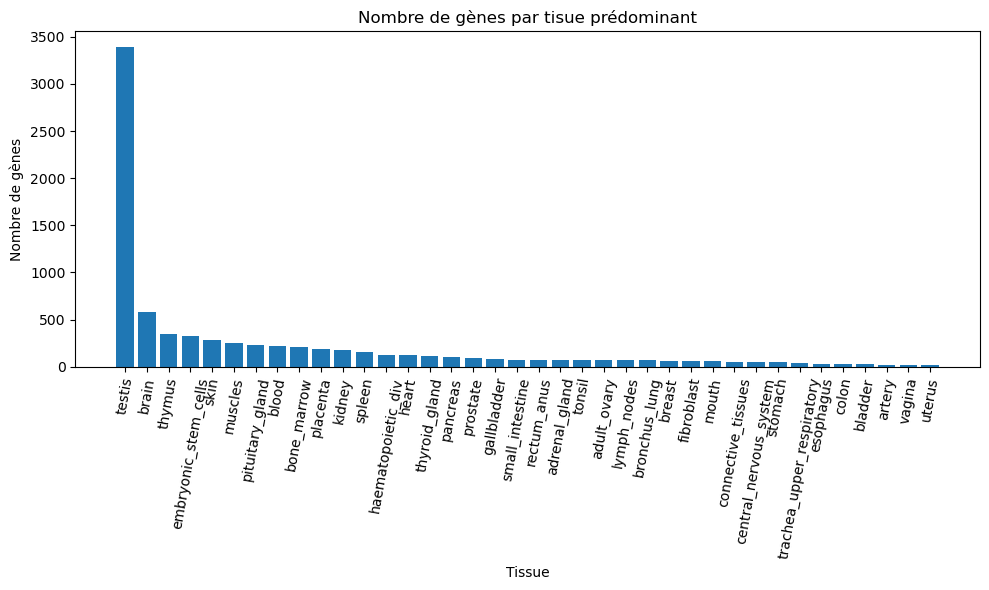

In [37]:
# Au départ, nous avons 3177 gènes.
# Représenter le nombre de gènes dans chacun de leur tissu prédominant.

# Configuration de l'affichage
plt.figure(figsize=(10, 6))
plt.xticks(rotation=80) # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xlabel('Tissue')
plt.ylabel('Nombre de gènes')
plt.title('Nombre de gènes par tisue prédominant')

# Création du graphique
gene_counts = df1['tissue'].value_counts()
plt.bar(gene_counts.index, gene_counts.values)

plt.tight_layout()
plt.show()


In [55]:
# gènes finales

genes=resultat['gene_symbol'].values

In [53]:
genes.columns = ['genes finals'] # renommage de la colonne

In [57]:
len(genes)

3308

In [14]:
# dataset "tsg2_GTEX_NORMAL_TISSUES"
# pas besoin de ce dataset

df8=pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_tsg2_GTEX_NORMAL_TISSUES_log_rpkm_2753_samples_34305_genes.csv", sep=";")

In [15]:
df8.head()

,id_gene,gene_symbol,GTEX-N7MS-0007-SM-2D7W1,GTEX-N7MS-0008-SM-4E3JI,GTEX-N7MS-0011-R10A-SM-2HMJK,GTEX-N7MS-0011-R11A-SM-2HMJS,GTEX-N7MS-0011-R1a-SM-2HMJG,GTEX-N7MS-0011-R2a-SM-2HML6,GTEX-N7MS-0011-R3a-SM-33HC6,GTEX-N7MS-0011-R4a-SM-2HMKW,...,GTEX-XYKS-1626-SM-4BRUQ,GTEX-XYKS-1726-SM-4E3IO,GTEX-XYKS-1826-SM-4E3JV,GTEX-XYKS-2126-SM-4E3IB,GTEX-XYKS-2226-SM-4E3IU,GTEX-XYKS-2426-SM-4AT43,GTEX-XYKS-2526-SM-4BOPX,GTEX-XYKS-2626-SM-4BRUT,GTEX-XYKS-2726-SM-4E3IC,GTEX-Y8E5-0006-SM-47JWQ
0,1,A1BG,0.39144,2.435062,1.374098,2.232256,1.679561,1.909921,1.271890,1.937988,...,2.267023,1.320945,1.447917,0.903320,1.138581,0.580404,2.348927,1.928660,1.731297,0.473033
1,2,A2M,0.89494,2.341820,5.087172,3.736135,5.062538,6.063812,4.886438,5.278866,...,7.160698,5.473496,7.882475,5.515017,5.958497,5.727102,6.724029,8.918433,6.752462,0.404502
2,3,A2MP1,0.02196,0.000000,0.078178,0.094767,0.148500,0.243603,0.066654,0.222251,...,0.095091,0.032362,0.184079,0.042481,0.072408,0.081540,0.217331,0.044392,0.195526,0.008808
3,10,NAT2,0.00000,0.024696,0.040979,0.021559,0.025333,0.000000,0.165600,0.096184,...,0.823068,0.144880,0.104487,0.000000,1.803586,0.000000,0.093964,0.039444,0.050106,0.000000
4,11,NATP,0.00000,0.000000,0.000000,0.000000,0.037963,0.000000,0.027067,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Représentation graphique :

In [36]:
# importation du datatset Average_expression_in_normal_tissues 

df = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/Average_expression_in_normal_tissues.csv", sep=";")

In [37]:
# suppression de la colonne 'id_gene'

df=df.drop('id_gene', axis=1)

In [38]:
df.head()

,gene_symbol,colon,uterus,female_genital,connective_tissues,rectum_anus,muscles,tonsil,embryonic_stem_cells,blood,...,hematopoietic,neuro,male_germinal,cardio_vascular,tracheo_broncho_lung,urinary_kidney,endocrine_gland,male_genital,hepato_bilary,head_neck
0,A1BG,0.921439,1.964743,1.719488,1.177337,0.141552,0.350299,0.375989,0.589084,0.994258,...,1.242904,1.792367,0.791208,1.486970,1.419016,0.785731,1.504148,1.531059,7.667611,0.939431
1,A1BG-AS1,0.462968,0.979163,0.746795,0.428260,0.300275,0.103680,0.749721,0.307138,0.448137,...,0.606642,0.694821,0.222968,0.629767,0.852581,0.472374,0.745205,0.756612,1.600621,0.453119
2,A1CF,1.454283,0.008365,0.007729,0.011699,2.511052,0.016319,0.000000,0.012868,0.040271,...,0.032135,0.005552,0.020338,0.007852,0.009616,0.872221,0.010908,0.011020,3.807548,0.006554
3,A2M,6.315057,7.177928,6.737944,7.743671,7.394189,4.875162,5.058426,0.391450,1.043442,...,0.978315,5.405587,4.524429,8.607759,9.911310,7.455689,6.566293,7.019779,7.869986,5.473478
4,A2M-AS1,1.178651,1.910047,1.503675,1.318282,0.817139,0.486709,0.527712,0.234122,0.153285,...,0.123232,1.100021,1.201406,1.451529,1.697580,1.664022,1.185032,1.597692,1.644354,0.759176


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51821 entries, 0 to 51820
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gene_symbol                51821 non-null  object 
 1   colon                      51771 non-null  float64
 2   uterus                     48288 non-null  float64
 3   female_genital             51774 non-null  float64
 4   connective_tissues         51771 non-null  float64
 5   rectum_anus                26344 non-null  float64
 6   muscles                    51617 non-null  float64
 7   tonsil                     26344 non-null  float64
 8   embryonic_stem_cells       26503 non-null  float64
 9   blood                      47509 non-null  float64
 10  fibroblast                 34282 non-null  float64
 11  brain                      51774 non-null  float64
 12  testis                     51771 non-null  float64
 13  central_nervous_system     34282 non-null  flo

In [40]:
# une fonction pour tracer un digramme en barre pour des niveaux d'expression d'un gène donné

def plot_gene_expression(df, gene):
    
    '''
    df: dataset qui contient les valeurs moyennes d’expression pour chaque paire [gène, tissu]
    gene : le gène en question(un gène parmi les gènes dans le dataset)

    '''
    
    # test de la présence du gene dans le dataset
    if gene not in df['gene_symbol'].values:
        print(f"Gene {gene} non trouvé dans le dataset.")
    
    # Sélection de la ligne qui correspond au gène dans le dataset
    gene_data = df[df['gene_symbol'] == gene].drop('gene_symbol', axis=1)
    
    # tissues normaux sélectionnés pour le traçage du graphe
    selected_tissues = ['adrenal_gland', 'adult_ovary', 'artery', 'bladder', 'blood', 'bone_marrow', 'brain', 'breast', 
                        'bronchus_lung', 'central_nervous_system', 'colon', 'connective_tissues', 'div_digestive', 
                        'embryonic_stem_cells', 'esophagus', 'female_genital', 'fibroblast', 'gallbladder', 'haematopoietic_div',
                        'heart', 'kidney', 'liver', 'lymph_nodes', 'mouth', 'muscles', 'pancreas', 'pituitary_gland', 'placenta',
                        'prostate', 'rectum_anus', 'skin', 'small_intestine', 'spleen', 'stomach', 'testis', 'thymus', 
                        'thyroid_gland', 'tonsil', 'trachea_upper_respiratory', 'uterus', 'vagina']  
    
    gene_data=gene_data[selected_tissues]
    
    # Transposer la ligne pour un traçage plus facile
    gene_data = gene_data.T
    gene_data.columns = ['Expression level'] # renommage de la colonne
    
    tissues = gene_data.index # les différents tissues
    
    # couleurs au niveau du graphe
    colors = ['blue' if gene == 'liver' else 'red' if value > 1 else 'grey' for gene, value in zip(tissues, gene_data.values)]
    
    # Tracé du graphe
    plt.figure(figsize=(15, 3))
    plt.bar(gene_data.index, gene_data['Expression level'], color=colors)
    
    plt.xticks(rotation=80)
    plt.title(gene)
    plt.ylabel('Expression level')


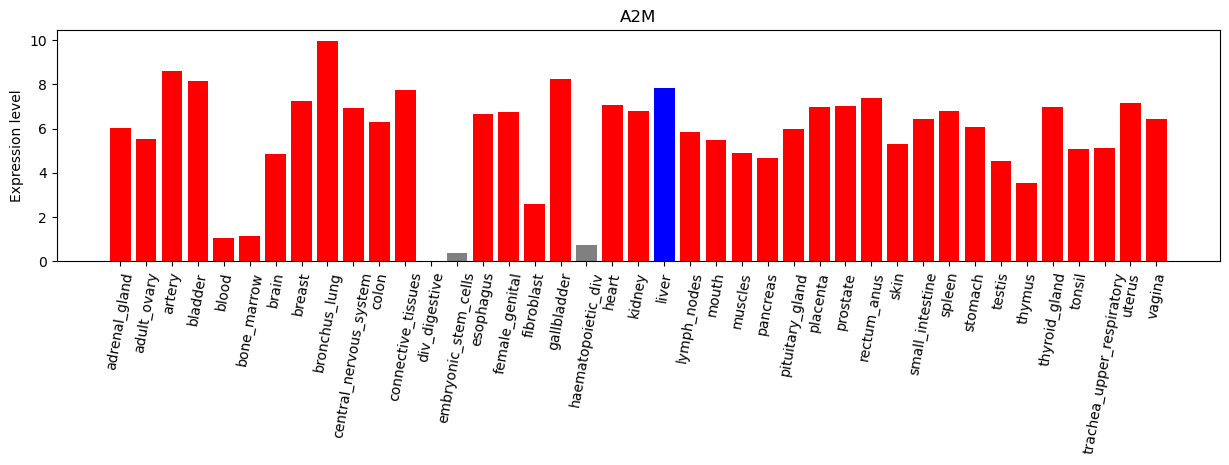

In [42]:
# Plotting for an example gene 'A2M'
plot_gene_expression(df, 'A2M')

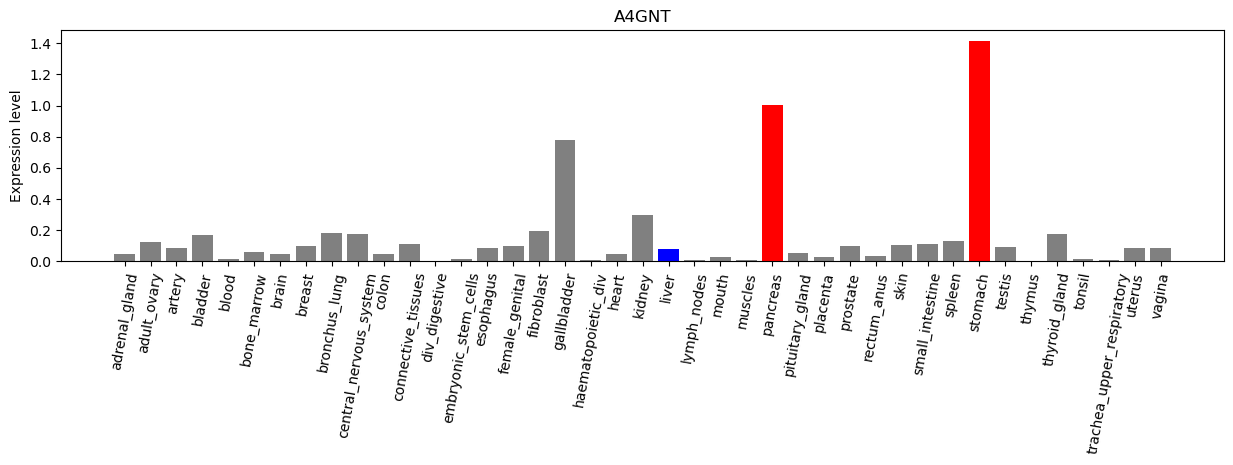

In [50]:
# Plotting for an example gene 'A2M'
plot_gene_expression(df, 'A4GNT')

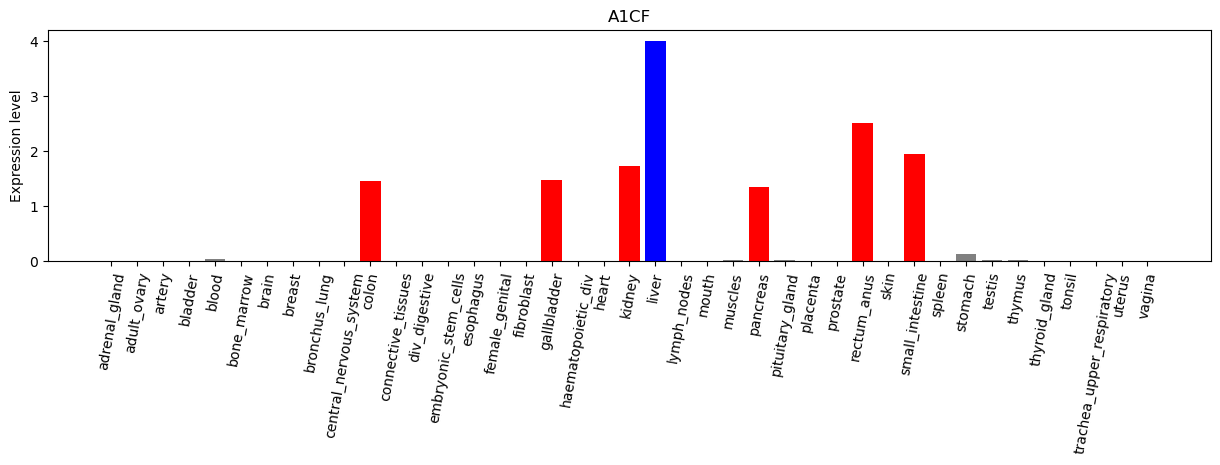

In [43]:
# Plotting for an example gene 'A1CF'
plot_gene_expression(df, 'A1CF')

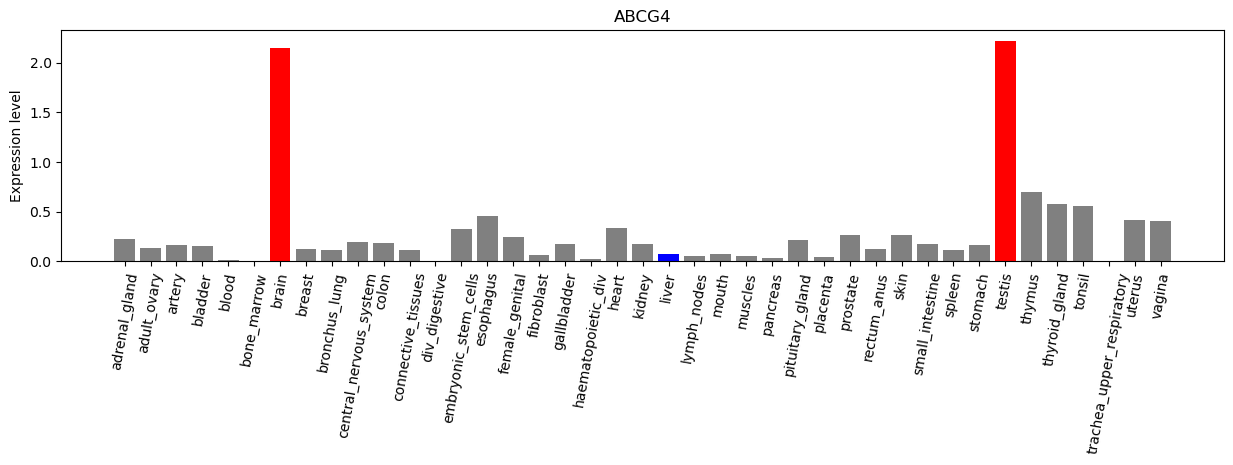

In [41]:
# Plotting for an example gene 'ABCG4'
plot_gene_expression(df, 'ABCG4')

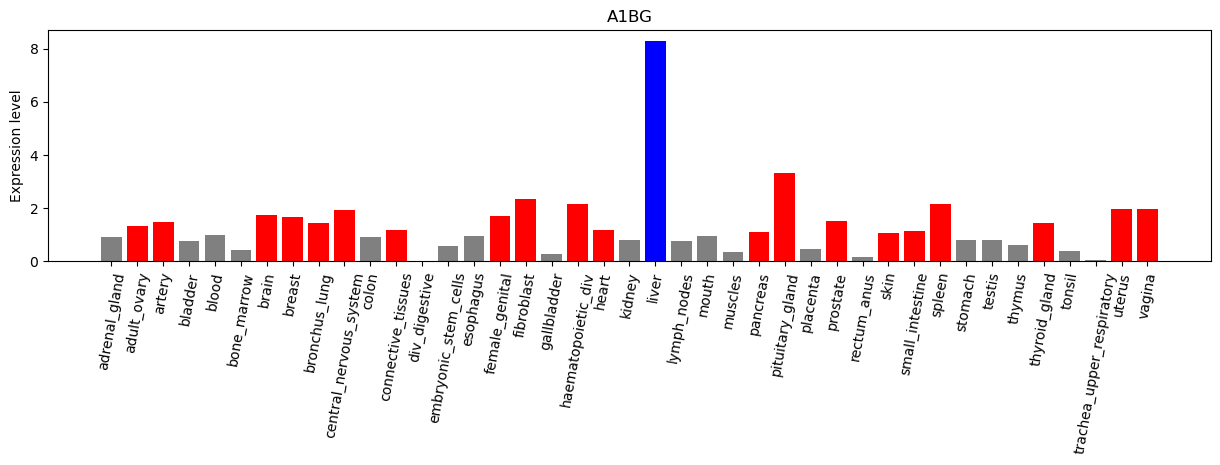

In [44]:
# Plotting for an example gene 'A1BG'
plot_gene_expression(df, 'A1BG')

## Sélection des gènes fréquemment activés dans le cancer

In [3]:
resultat=pd.read_csv('result_TCGA_LIHC.csv', sep="\t")

In [8]:
resultat.head()
#len(resultat['gene_symbol'].unique())

,id_gene,gene_symbol,TCGA-2V-A95S-01A,TCGA-2Y-A9GS-01A,TCGA-2Y-A9GT-01A,TCGA-2Y-A9GU-01A,TCGA-2Y-A9GV-01A,TCGA-2Y-A9GW-01A,TCGA-2Y-A9GX-01A,TCGA-2Y-A9GY-01A,...,TCGA-ZP-A9CZ-01A,TCGA-ZP-A9D0-01A,TCGA-ZP-A9D1-01A,TCGA-ZP-A9D2-01A,TCGA-ZP-A9D4-01A,TCGA-ZS-A9CD-01A,TCGA-ZS-A9CE-01A,TCGA-ZS-A9CF-01A,TCGA-ZS-A9CF-02A,TCGA-ZS-A9CG-01A
0,51146.0,A4GNT,3.726570,0.099093,0.020342,0.000000,0.000000,0.018777,0.087870,0.036609,...,0.036327,0.015640,0.018207,0.142087,0.015783,0.000000,0.000000,0.039419,0.053945,0.000000
1,344752.0,AADACL2,0.000000,0.000000,0.007196,0.000000,0.008343,0.000000,0.006334,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005616,0.007196,0.004465,0.007052,0.000000,0.006190
2,15.0,AANAT,0.092072,0.185105,0.016782,0.016354,0.057831,0.075875,0.014927,0.199500,...,0.044884,0.025738,0.000000,0.060324,0.038858,0.016782,0.000000,0.032524,0.088006,0.000000
3,284837.0,AATBC,0.127237,0.113967,0.189287,0.312200,0.202637,0.093425,0.089769,0.247806,...,0.146916,0.050885,0.046282,0.329985,0.340163,0.051163,0.119024,0.197111,0.052555,0.025312
4,26154.0,ABCA12,0.000000,0.009491,0.003746,0.003746,0.008774,0.003458,0.016639,0.003458,...,0.000000,0.008774,0.016924,0.035483,0.017637,0.011209,0.011639,0.150690,0.016782,0.016068


In [9]:
# Lecture du fichier Excel EpiMed_experimental_grouping_2024.03.03_TCGA-LIHC

data = pd.read_excel("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/EpiMed_experimental_grouping/EpiMed_experimental_grouping_2024.03.03_TCGA-LIHC.xlsx", sheet_name="standard exp_group")

# Affichage des dimensions pour vérification (équivalent à `dim(cores)` en R)
print(data.shape)

C:\Users\DIAGNE Ibrahima\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(439, 42)


In [10]:
#data.head()

In [11]:
# Sélection des échantillons normaux
normal_data = data[data['tissue_status'] == "normal"]

# Affichage des dimensions après sélection
print(normal_data.shape)

(59, 42)


In [12]:
#normal_data.head()

In [13]:
# Sélection des échantillons tumoraux
tumoral_data = data[data['tissue_status'] == "tumoral"]

# Affichage des dimensions après sélection
print(tumoral_data.shape)

(380, 42)


In [14]:
#tumoral_data.head()

#### Représentation graphique du nombre d'échantillons par statut tissulaire( normal ou tumoral)

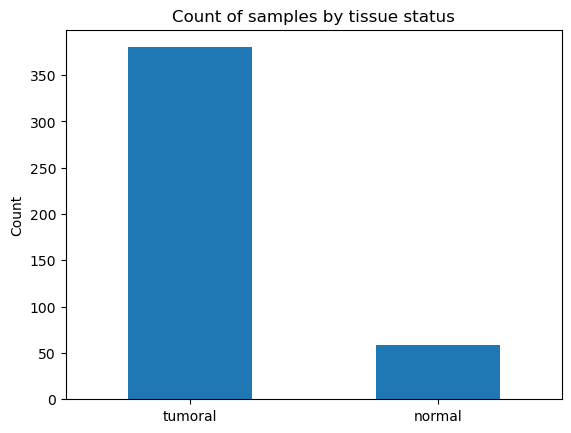

In [15]:
# Graphique du nombre d'échantillons par statut tissulaire
data['tissue_status'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Count of samples by tissue status')
plt.xticks(rotation=0)
plt.show()

Après avoir répartit les échantillons normaux et tumoraux dans deux datasets différents, il faut les correspondre aux différents gènes. 

#### Méthode 1:

In [113]:
m = resultat.shape[1]

# Initialisation de la liste x pour stocker les indices des colonnes correspondantes
x = []

# Boucle à travers chaque id_sample dans normal_data
for id_sample in normal_data['id_sample']:
   
    for j in range(2, m):  
        
        # Vérifie si id_sample correspond au nom de la colonne et n'est pas NA
        if pd.notna(id_sample) and id_sample == resultat.columns[j]:
            x.append(j)
            break


# Sélection des colonnes correspondantes
selected_columns = resultat.iloc[:, [0, 1] + x]

# Création du nouveau DataFrame
normal_data_sample = pd.DataFrame(selected_columns)

# Renommage des colonnes pour conserver id_gene et gene_symbol, et ajouter les colonnes sélectionnées
normal_data_sample.columns = ['id_gene', 'gene_symbol'] + [resultat.columns[i] for i in x]

#### Méthode 2:

In [16]:
# Préparation d'une liste pour les indices de colonnes correspondants
selected_columns = [col for col in normal_data['id_sample'].unique() if col in resultat.columns]

# Sélection des données basées sur les colonnes correspondantes plus les colonnes 'id_gene' et 'gene_symbol'
normal_data_sample = resultat[['gene_symbol'] + selected_columns]

In [17]:
normal_data_sample=normal_data_sample.dropna(how='all', axis=1)

In [18]:
# normal_data_sample = normal_data_sample.drop(columns=['id_gene'])

In [19]:
# Mettre la colonne 'gene_symbol' comme index du DataFrame

normal_data_sample = normal_data_sample.set_index('gene_symbol')

In [20]:
#normal_data_sample.head()

In [21]:
# Préparation d'une liste pour les indices de colonnes correspondants
selected_columns = [col for col in tumoral_data['id_sample'].unique() if col in resultat.columns]

# Sélection des données basées sur les colonnes correspondantes plus les colonnes 'id_gene' et 'gene_symbol'
tumoral_data_sample = resultat[['gene_symbol'] + selected_columns]

In [22]:
tumoral_data_sample=tumoral_data_sample.dropna(how='all', axis=1)

In [23]:
#tumoral_data_sample = tumoral_data_sample.drop(columns=['id_gene'])

In [24]:
# Mettre la colonne 'gene_symbol' comme index du DataFrame

tumoral_data_sample = tumoral_data_sample.set_index('gene_symbol')

In [21]:
#tumoral_data_sample.head()

On introduit maintenant un seuil empirique égal à la moyenne plus deux écart-types des niveaux d’expression dans les échantillons non-tumoraux ainsi les fréquences d'activation ectopiques.

In [25]:
normal_data_sample.shape

(3308, 50)

In [26]:
normal_data_sample.index[0]

'A4GNT'

In [27]:
import numpy as np

# Création d'un DataFrame vide avec les colonnes spécifiées
frequence_norm = pd.DataFrame(columns=["gene_symbol", "seuil_normal", "freq_normal", "pourcentile_normal"])

# Boucler sur chaque ligne de list1_data_GSE13159
for i in range(normal_data_sample.shape[0]):
    
    # le symbole du gène
    gene_symbol = normal_data_sample.index[i]
    
    # Calculer le seuil_normal comme la moyenne + 2*écart-type pour les colonnes de 3 à 61
    seuil_normal = normal_data_sample.iloc[i,:].mean() + 2 * normal_data_sample.iloc[i,:].std()
    
    # Calculer freq_normal comme le pourcentage de valeurs au-delà du seuil dans les colonnes
    freq_normal = np.sum(normal_data_sample.iloc[i, :] > seuil_normal) * 100 / 50
    
    # Calculer pourcentile_tumoral comme 100 - freq_BM_tumoral
    pourcentile_normal = 100 - freq_normal
    
    # Ajouter ces valeurs au dataframe frequence
    new_line = pd.DataFrame([{ "gene_symbol": gene_symbol, 
                                  "seuil_normal": seuil_normal, 
                                  "freq_normal": freq_normal, 
                                  "pourcentile_normal": pourcentile_normal}])
    frequence_norm = pd.concat([frequence_norm, new_line], ignore_index=True)

In [28]:
frequence_norm=frequence_norm.set_index('gene_symbol')

In [29]:
#frequence_norm.head()

In [30]:
# Création d'un DataFrame vide avec les colonnes spécifiées
frequence_tumo = pd.DataFrame(columns=["gene_symbol", "seuil_normal", "freq_tumoral", "pourcentile_tumoral"])

# Boucler sur chaque ligne
for i in range(tumoral_data_sample.shape[0]):
    # Extraire le symbole du gène
    gene_symbol = tumoral_data_sample.index[i]
    
    # Calculer le seuil_normal comme la moyenne + 2*écart-type pour les colonnes de 3 à 61
    seuil_normal = normal_data_sample.iloc[i, :].mean() + 2 * normal_data_sample.iloc[i, :].std()
    
    # Calculer freq_normal comme le pourcentage de valeurs au-delà du seuil dans les colonnes
    freq_tumoral = np.sum(tumoral_data_sample.iloc[i, :] > seuil_normal) * 100 / 374
    
    # Calculer pourcentile_tumoral comme 100 - freq_BM_tumoral
    pourcentile_tumoral = 100 - freq_tumoral
    
    # Ajouter ces valeurs au dataframe frequence
    new_line = pd.DataFrame([{"gene_symbol": gene_symbol, 
                                  "seuil_normal": seuil_normal, 
                                  "freq_tumoral": freq_tumoral, 
                                  "pourcentile_tumoral": pourcentile_tumoral}])
    frequence_tumo = pd.concat([frequence_tumo, new_line], ignore_index=True)

In [31]:
frequence_tumo = frequence_tumo.set_index('gene_symbol')

In [32]:
#frequence_tumo.head()

In [33]:
list_data_tumo = frequence_tumo[frequence_tumo['freq_tumoral'] > 10]
list_data_norm = frequence_norm[frequence_norm['freq_normal'] < 5]

In [34]:
#list_data_tumo.head()

In [35]:
list_data_tumo.shape

(2376, 3)

In [36]:
#list_data_norm.head()

In [37]:
list_data_norm.shape

(1938, 3)

In [38]:
# Préparation d'une liste pour les genes respectant les deux conditions (>10 et < 5)

selected_genes=[gene for gene in list_data_norm.index.unique() if gene in list_data_tumo.index]

In [39]:
#selected_genes

In [40]:
selected_genes=[gene for gene in list_data_norm.index.unique() if gene in list_data_tumo.index]

In [41]:
gene_datas=pd.DataFrame(selected_genes, columns=['Gene_symbol'])

In [39]:
#gene_datas.shape
#gene_datas

## Création d'une fonction pour automatiser la sélection de gènes fréquemment activés dans d'autres datasets.

In [75]:
# Lecture du fichier Excel 

data = pd.read_excel("C:/Users/DIAGNE Ibrahima/Downloads/Groups.xlsx")

In [76]:
data.head()

,id_sample,dataset,NT,All-tumours,Male,Female,Grade_G1,Grade_G2,Grade_G3,Grade_G1-G2,...,Stage_I-II,Stage_III-IV,Indian,Asian,Black,White,Indian_Asian,Black_White,HCV,HBV
0,TCGA-BC-A10Q-11A,TCGA-LIHC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-BC-A10R-11A,TCGA-LIHC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-BC-A10T-11A,TCGA-LIHC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-BC-A10U-11A,TCGA-LIHC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-BC-A10W-11A,TCGA-LIHC,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
data['NT'] = data['NT'].fillna(0)
data['All-tumours'] = data['All-tumours'].fillna(0)

In [78]:
data['NT'] = data['NT'].astype(int)
data['All-tumours'] = data['All-tumours'].astype(int)

### dataset "GSE121248"

In [79]:
# données cliniques du dataset "GSE121248"

normal_data_GSE121248 = data[(data['dataset'] == "GSE121248") & (data['NT'] == 1)]
tumoral_data_GSE121248 = data[(data['dataset'] == "GSE121248") & (data['All-tumours'] == 1)]

In [80]:
# données d'expression du dataset "GSE121248"

expression_data_GSE121248 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE121248_GSE121248_log_expression_107_samples_21872_genes.csv", sep=";")

In [81]:
expression_data_GSE121248.shape

(21872, 109)

### dataset "GSE76427"

In [82]:
# données cliniques du dataset "GSE76427"

normal_data_GSE76427 = data[(data['dataset'] == "GSE76427") & (data['NT'] == 1)]
tumoral_data_GSE76427 = data[(data['dataset'] == "GSE76427") & (data['All-tumours'] == 1)]

In [83]:
# données d'expression du dataset "GSE76427" 

expression_data_GSE76427 = pd.read_csv("C:/Users/DIAGNE Ibrahima/Desktop/Stage_IAB_2024/data/expression_data_GSE76427_GSE76427_log_expression_167_samples_30499_genes.csv", sep=";")

Ci-après, nous allons créer une fonction qui permet de calculer les fréquences d'activations des gènes dans les différents datasets.

In [84]:
# dans la préparation, mettre gene_symbol en index dans expression_data

def frequent_genes(expression_data, normal_data,tumoral_data):
    
    '''
    normal_data: données cliniques(EpiMed_experimental_grouping pour les échantillons normaux)
    
    tumoral_data: données cliniques(EpiMed_experimental_grouping pour les échantillons tumoraux)
    
    expression_data: données d'expressions de gènes
    
    '''

    # Préparation d'une liste pour les indices de colonnes correspondants
    selected_columns = [col for col in normal_data['id_sample'].unique() if col in expression_data.columns]

    # Sélection des données basées sur les colonnes correspondantes plus la colonne gene_symbol'
    normal_data_sample = expression_data[['gene_symbol'] + selected_columns]
    normal_data_sample=normal_data_sample.dropna(how='all', axis=1) # drop nan 
    
    # Mettre la colonne 'gene_symbol' comme index du DataFrame
    normal_data_sample = normal_data_sample.set_index('gene_symbol')

    # Préparation d'une liste pour les indices de colonnes correspondants
    selected_columns = [col for col in tumoral_data['id_sample'].unique() if col in expression_data.columns]

    # Sélection des données basées sur les colonnes correspondantes plus les colonnes 'id_gene' et 'gene_symbol'
    tumoral_data_sample = expression_data[['gene_symbol'] + selected_columns]
    tumoral_data_sample=tumoral_data_sample.dropna(how='all', axis=1) # drop nan 
    
    # Mettre la colonne 'gene_symbol' comme index du DataFrame
    tumoral_data_sample = tumoral_data_sample.set_index('gene_symbol')
    
    # Création d'un DataFrame vide avec les colonnes spécifiées pour les fréquences d'activaion NT
    frequence_norm = pd.DataFrame(columns=["gene_symbol", "seuil_normal", "freq_normal", "pourcentile_normal"])
    
    N1 = normal_data_sample.shape[1] # nombre de colonnes du tableau
    
    # Boucler sur chaque ligne de normal_data_sample
    for i in range(normal_data_sample.shape[0]):
        
        # le symbole du gène
        gene_symbol = normal_data_sample.index[i]
        
        # Calculer le seuil_normal comme la moyenne + 2*écart-type
        seuil_normal = normal_data_sample.iloc[i,:].mean() + 2 * normal_data_sample.iloc[i,:].std()
        
        # Calculer freq_normal comme le pourcentage de valeurs au-delà du seuil dans les colonnes
        freq_normal = np.sum(normal_data_sample.iloc[i, :] > seuil_normal) * 100 / N1
        
        # Calculer pourcentile_tumoral comme 100 - freq_normal
        pourcentile_normal = 100 - freq_normal
        
        # Ajouter ces valeurs au dataframe frequence
        new_line = pd.DataFrame([{ "gene_symbol": gene_symbol, 
                                      "seuil_normal": seuil_normal, 
                                      "freq_normal": freq_normal, 
                                      "pourcentile_normal": pourcentile_normal}])
        frequence_norm = pd.concat([frequence_norm, new_line], ignore_index=True)
        
    frequence_norm=frequence_norm.set_index('gene_symbol') # gene_symbol en index
    
    # Création d'un DataFrame vide avec les colonnes spécifiées pour les fréquences d'activation T(tumoral)
    frequence_tumo = pd.DataFrame(columns=["gene_symbol", "seuil_normal", "freq_tumoral", "pourcentile_tumoral"])
    
    N2 = tumoral_data_sample.shape[1] # nombre de colonnes du tableau
    
    # Boucler sur chaque ligne
    for i in range(tumoral_data_sample.shape[0]):
        
        # Extraire le symbole du gène
        gene_symbol = tumoral_data_sample.index[i]
        
        # Calculer le seuil_normal comme la moyenne + 2*écart-type 
        seuil_normal = normal_data_sample.iloc[i, :].mean() + 2 * normal_data_sample.iloc[i, :].std()
        
        # Calculer freq_normal comme le pourcentage de valeurs au-delà du seuil dans les colonnes
        freq_tumoral = np.sum(tumoral_data_sample.iloc[i, :] > seuil_normal) * 100 / N2
        
        # Calculer pourcentile_tumoral comme 100 - freq_BM_tumoral
        pourcentile_tumoral = 100 - freq_tumoral
        
        # Ajouter ces valeurs au dataframe frequence
        new_line = pd.DataFrame([{"gene_symbol": gene_symbol, 
                                      "seuil_normal": seuil_normal, 
                                      "freq_tumoral": freq_tumoral, 
                                      "pourcentile_tumoral": pourcentile_tumoral}])
        frequence_tumo = pd.concat([frequence_tumo, new_line], ignore_index=True)
        
    frequence_tumo=frequence_tumo.set_index('gene_symbol') # gene_symbol en index
    
    # fréquences des gènes qui respectent les conditions(<5 pour NT et >10 pour T)
    list_data_tumo = frequence_tumo[frequence_tumo['freq_tumoral'] > 10]
    list_data_norm = frequence_norm[frequence_norm['freq_normal'] < 5]
    
    selected_genes=[gene for gene in list_data_norm.index.unique() if gene in list_data_tumo.index]
    gene_datas=pd.DataFrame(selected_genes, columns=['Gene_symbol'])
    
    return gene_datas
    

## Tests:

**Pour le dataset GSE121248**

In [85]:
genes_data_GSE121248 = frequent_genes(expression_data_GSE121248, normal_data_GSE121248, tumoral_data_GSE121248)

In [115]:
genes_data_GSE121248.shape

(7492, 1)

**Pour le dataset GSE76427**

In [125]:
genes_data_GSE76427 = frequent_genes(expression_data_GSE76427, normal_data_GSE76427, tumoral_data_GSE76427)

In [137]:
genes_data_GSE76427

,Gene_symbol
0,AARS1
1,ABCA3
2,ABCF1
3,ABCA4
4,ACAT2
...,...
6437,CHKB-DT
6438,RNU6ATAC
6439,PATE3
6440,TOMM6


In [143]:
selected_genes=[gene for gene in genes_data_GSE76427.values if gene in genes_data_GSE121248.values]

In [140]:
selected_genes=pd.DataFrame(selected_genes)

In [141]:
selected_genes

,0
0,ABCA4
1,ASIC1
2,ACP1
3,ACYP1
4,ADA
...,...
3661,FAM47E
3662,LRRC69
3663,TSTD1
3664,CD24


In [144]:
gene_final = pd.read_csv('genes_data1.csv', sep=';')

In [145]:
genes=[gene for gene in selected_genes if gene in gene_final.values]

In [147]:
genes=pd.DataFrame(genes, columns=['gene_symbol'])

In [149]:
genes

,gene_symbol
0,ASIC1
1,AQP8
2,CYP27B1
3,SLC26A3
4,DSG1
...,...
104,LIN28B
105,FAR2P1
106,XAGE1A
107,SPCS2P4


In [57]:
gene_datas.to_csv('genes_data1.csv', index=False, sep=';')

## Representation graphique pour le gene A4GNT

In [51]:
tumoral_data_sample

,TCGA-G3-A3CG-01A,TCGA-DD-AAVP-01A,TCGA-FV-A3R3-01A,TCGA-G3-A25Y-01A,TCGA-DD-AADU-01A,TCGA-BC-A10S-01A,TCGA-5R-AA1D-01A,TCGA-G3-A25Z-01A,TCGA-DD-AAEH-01A,TCGA-CC-5262-01A,...,TCGA-DD-AAE0-01A,TCGA-FV-A4ZP-01A,TCGA-DD-A39V-01A,TCGA-DD-AAEK-01A,TCGA-DD-AAVX-01A,TCGA-DD-A11A-01A,TCGA-ZP-A9CY-01A,TCGA-BC-A10R-01A,TCGA-QA-A7B7-01A,TCGA-CC-5264-01A
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A4GNT,0.000000,0.000000,0.591488,0.929791,0.000000,0.000000,0.017637,0.000000,0.000000,0.756340,...,3.516910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025596,0.063503,0.045163
AADACL2,0.007196,0.000000,0.005472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033793,0.000000,0.000000,0.000000,0.000000
AANAT,0.016924,0.000000,0.038015,0.040402,0.106214,0.044604,0.014498,0.020484,0.048655,0.015069,...,0.107018,0.609660,0.017779,0.024887,0.023184,0.022758,0.026871,0.010637,0.052555,0.037453
AATBC,0.022474,0.000000,0.050188,0.283448,0.068052,0.044324,0.031960,0.000000,0.028852,0.078473,...,0.032383,0.100305,0.077106,0.075875,0.080385,0.025171,0.064607,0.051024,0.648650,0.037171
ABCA12,0.000000,0.005759,0.011496,0.025029,0.003458,0.007626,0.019488,0.013784,0.000000,0.010207,...,0.000000,0.004034,0.015926,0.011209,0.010493,0.075190,0.006047,0.011925,0.011925,0.006334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN1,0.030265,0.045583,0.078610,0.000000,0.014070,0.030265,0.076696,0.018492,0.014784,0.000000,...,0.032947,0.000000,0.016068,0.000000,0.000000,0.090040,0.000000,0.056584,0.255319,0.000000
ZSCAN10,0.011066,0.000000,0.000000,0.013355,0.000000,0.014784,0.009491,0.000000,0.000000,0.000000,...,0.024036,0.011782,0.000000,0.000000,0.030265,0.007483,0.000000,0.013927,0.007052,0.000000
ZSCAN23,0.011209,0.000000,0.057831,0.072312,0.000000,0.000000,0.205017,0.006765,0.000000,0.000000,...,0.024036,0.000000,0.000000,0.000000,0.015212,0.022474,0.000000,0.013927,0.000000,0.006190


In [53]:
# pour le gène A4GNT

data_A4GNT_tumoral = tumoral_data_sample.loc['KIF4A'] # A4GNT
data_A4GNT_normal = normal_data_sample.loc['KIF4A']

In [54]:
# seuil ms2d

seuil_normal = round(frequence_norm.loc["KIF4A"]['seuil_normal'],2)
seuil_normal

0.36

In [55]:
expressions = data_A4GNT_tumoral.values

data1=[]
data2=[]

for exp in expressions:
    if exp<seuil_normal:
        data1.append(exp)
    else:
        data2.append(exp)

In [56]:
# pourcentages

a = round(frequence_tumo.loc['KIF4A']['pourcentile_tumoral'],2)
b = round(frequence_tumo.loc['KIF4A']['freq_tumoral'],2)

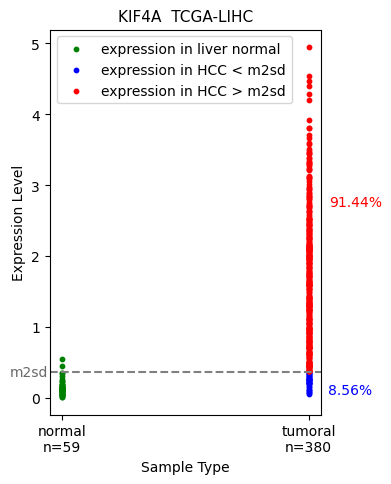

In [72]:
x_values_normal = [1] * normal_data_sample.shape[1]
x_values_tumoral = [2] * len(data1)
x_values_tumoral1 = [2] * len(data2)

# Création du graphique
plt.figure(figsize=(3.5, 5))
plt.scatter(x_values_normal, data_A4GNT_normal.values, color='green', label='expression in liver normal',s=10)
plt.scatter(x_values_tumoral, data1, color='blue', label='expression in HCC < m2sd',s=10)
plt.scatter(x_values_tumoral1, data2, color='red', label='expression in HCC > m2sd',s=10)
plt.axhline(y=seuil_normal, color='grey', linestyle='--')
plt.title("KIF4A  TCGA-LIHC", fontsize=11)
# Ajout de labels et de légende
plt.xlabel('Sample Type')
plt.ylabel('Expression Level')
plt.xticks([1, 2], ['normal\nn=59', 'tumoral\nn=380'])

# Ajout de text 
x_limit = plt.gca().get_xlim()
y_limit = plt.gca().get_ylim()

plt.text(x_limit[1] * 1.12, y_limit[1] * 0.55, f"{b}%", color='red', ha='right', va='top')
plt.text(x_limit[1] * 1.10, y_limit[1] * 0.04, f"{a}%", color='blue', ha='right', va='top')

# le seuil m2sd
plt.text(x_limit[0] * 0.83, seuil_normal, 'm2sd', color='dimgrey', ha='left', va='center')

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.show()


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Ectopy_adaptive_thresholds_TCGA_LIHC.csv", sep=";")
data.head()

,Unnamed: 0,0
0,CENPI,0.794974
1,GNGT1,NaN
2,MYCN,0.932226
3,PABPC3,NaN
4,SOX2,NaN
